In [22]:
#importing library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset with read_csv
df=pd.read_csv('../input/sundown-and-sunset-data-20102020/Sunup_Sundown_Data.csv')
#showing the dataset
df

,City,Date,Sunup,Sundown
0,toronto,2010-01-01,07:51,16:51
1,toronto,2010-01-02,07:51,16:52
2,toronto,2010-01-03,07:51,16:53
3,toronto,2010-01-04,07:51,16:54
4,toronto,2010-01-05,07:51,16:55
...,...,...,...,...
4013,toronto,2020-12-27,07:50,16:47
4014,toronto,2020-12-28,07:50,16:48
4015,toronto,2020-12-29,07:50,16:49
4016,toronto,2020-12-30,07:50,16:49


In [3]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     4018 non-null   object
 1   Date     4018 non-null   object
 2   Sunup    4018 non-null   object
 3   Sundown  4018 non-null   object
dtypes: object(4)
memory usage: 125.7+ KB


# Preprocessing

In [4]:
df['Month']=df['Date'].apply(lambda x:x[5:7])



In [8]:
df['SunupMinute']=df['Sunup'].apply(lambda time:time[-2:])
df['SunupHour']=df['Sunup'].apply(lambda time:time[:2])
df['SundownMinute']=df['Sundown'].apply(lambda time:time[-2:])
df['SundownHour']=df['Sundown'].apply(lambda time:time[:2])


In [9]:
df

,City,Date,Sunup,Sundown,Month,SunupMinute,SunupHour,SundownMinute,SundownHour
0,toronto,2010-01-01,07:51,16:51,01,51,07,51,16
1,toronto,2010-01-02,07:51,16:52,01,51,07,52,16
2,toronto,2010-01-03,07:51,16:53,01,51,07,53,16
3,toronto,2010-01-04,07:51,16:54,01,51,07,54,16
4,toronto,2010-01-05,07:51,16:55,01,51,07,55,16
...,...,...,...,...,...,...,...,...,...
4013,toronto,2020-12-27,07:50,16:47,12,50,07,47,16
4014,toronto,2020-12-28,07:50,16:48,12,50,07,48,16
4015,toronto,2020-12-29,07:50,16:49,12,50,07,49,16
4016,toronto,2020-12-30,07:50,16:49,12,50,07,49,16


In [10]:
#dropping original column
df=df.drop(['Sunup','Sundown'],axis=1)

In [11]:
df

,City,Date,Month,SunupMinute,SunupHour,SundownMinute,SundownHour
0,toronto,2010-01-01,01,51,07,51,16
1,toronto,2010-01-02,01,51,07,52,16
2,toronto,2010-01-03,01,51,07,53,16
3,toronto,2010-01-04,01,51,07,54,16
4,toronto,2010-01-05,01,51,07,55,16
...,...,...,...,...,...,...,...
4013,toronto,2020-12-27,12,50,07,47,16
4014,toronto,2020-12-28,12,50,07,48,16
4015,toronto,2020-12-29,12,50,07,49,16
4016,toronto,2020-12-30,12,50,07,49,16


In [12]:
df['City'].unique()

array(['toronto'], dtype=object)

In [13]:
#dropping the city column
df.drop('City',axis=1,inplace=True)

In [14]:
df

,Date,Month,SunupMinute,SunupHour,SundownMinute,SundownHour
0,2010-01-01,01,51,07,51,16
1,2010-01-02,01,51,07,52,16
2,2010-01-03,01,51,07,53,16
3,2010-01-04,01,51,07,54,16
4,2010-01-05,01,51,07,55,16
...,...,...,...,...,...,...
4013,2020-12-27,12,50,07,47,16
4014,2020-12-28,12,50,07,48,16
4015,2020-12-29,12,50,07,49,16
4016,2020-12-30,12,50,07,49,16


In [16]:
#dropping the date column
df.drop('Date',axis=1,inplace=True)

In [17]:
df

,Month,SunupMinute,SunupHour,SundownMinute,SundownHour
0,01,51,07,51,16
1,01,51,07,52,16
2,01,51,07,53,16
3,01,51,07,54,16
4,01,51,07,55,16
...,...,...,...,...,...
4013,12,50,07,47,16
4014,12,50,07,48,16
4015,12,50,07,49,16
4016,12,50,07,49,16


In [26]:
df=df.astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


# Visualization

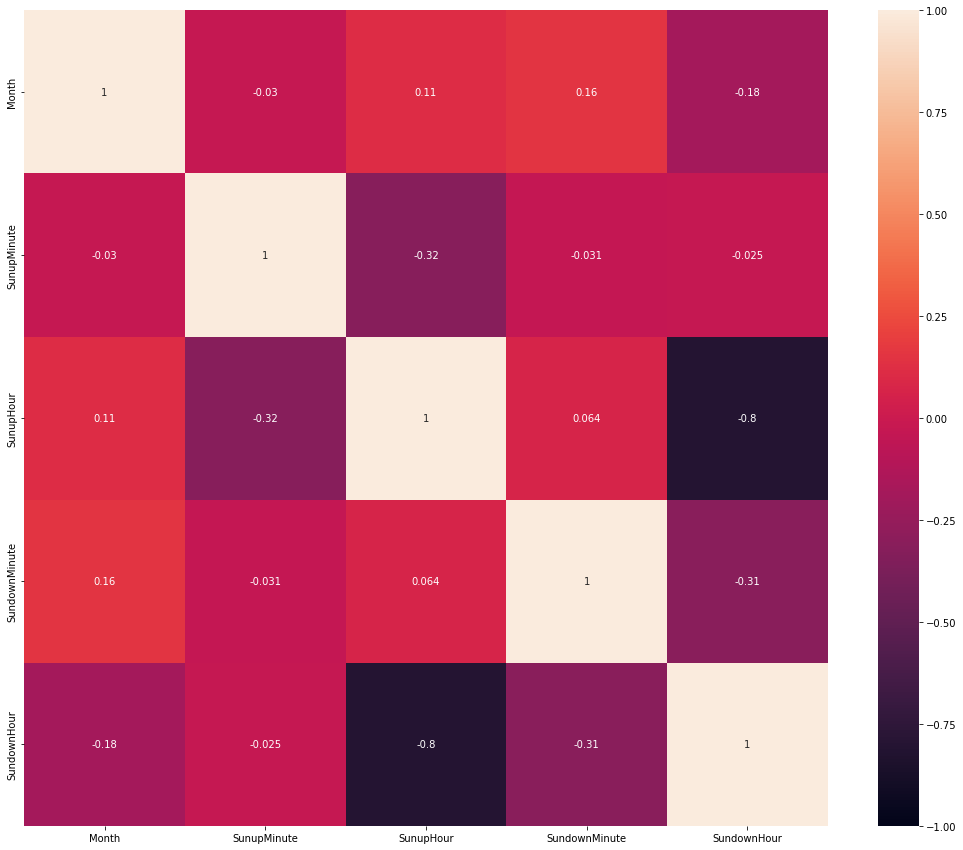

In [27]:
corr=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,vmin=-1.0,vmax=1.0,cmap='rocket')
plt.show()

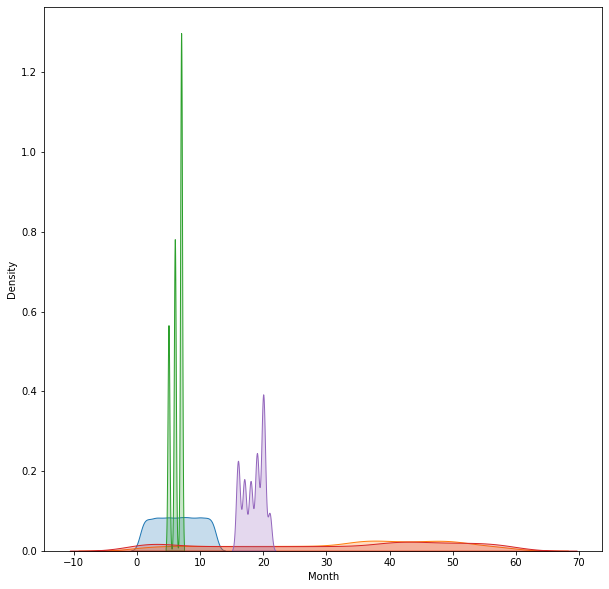

In [32]:
plt.figure(figsize=(10,10))
for column in df.columns:
    sns.kdeplot(df[column],shade=True)
plt.show()

# Splitting and Scaling the Dataset

In [33]:
y=df['Month'].copy()
x=df.drop('Month',axis=1).copy()


In [34]:
#Scaling the dataset
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=122)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2812, 4)
(1206, 4)
(2812,)
(1206,)


# Training

In [38]:
#training the model
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8150912106135987

In [39]:
model.predict(x_test)

array([2, 4, 6, ..., 3, 7, 1])

In [41]:
y_test

2593     2
604      8
3444     6
1860     2
785      2
        ..
2567     1
985      9
3185     9
2018     7
2498    11
Name: Month, Length: 1206, dtype: int64

In [ ]:
|